In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
men = pd.read_csv('men.csv')
women = pd.read_csv('women.csv')
display(men.shape)
women.shape

(9269, 5)

(15511, 5)

In [3]:
display(men.head())
women.head()
men.drop('Unnamed: 0', axis=1, inplace=True)
women.drop('Unnamed: 0', axis=1, inplace=True)

,Unnamed: 0,Brand,Category,Price,Product_Name
0,0,Fioroni,Shirts,350,Cotton Chambray Shirt
1,1,Barneys New York,Shirts,265,Floral Cotton Dress Shirt
2,2,Rag & Bone,Shirts,225,Fit 3 Plaid Cotton Flannel Shirt
3,3,AMIRI,Shirts,650,Gradient Plaid Cotton-Blend Flannel Shirt
4,4,Boglioli,Shirts,325,Slub-Weave Linen Shirt


In [4]:
men.Price=men.Price.str.replace(',','').str.replace('$','')
women.Price=women.Price.str.replace(',','').str.replace('$','')

In [5]:
men_rangeprice = men[men['Price'].str.contains(' - ') == True]
women_rangeprice = women[women['Price'].str.contains(' - ') == True]
# men_rangeprice.Price = men_rangeprice.Price.str.split(' - ').reset_index()
# women_rangeprice.Price = women_rangeprice.Price.str.split(' - ').reset_index()

In [6]:
men_rangeprice.Price = men_rangeprice.Price.str.split(' - ')
women_rangeprice.Price = women_rangeprice.Price.str.split(' - ')

C:\Users\dlm66\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [7]:
men_rangeprice.reset_index(inplace=True)

In [8]:
women_rangeprice.reset_index(inplace=True)

In [9]:
display(men_rangeprice.head())
women_rangeprice.head()

,index,Brand,Category,Price,Product_Name
0,76,Barneys New York,Shirts,"[245, 255]",Cotton Broadcloth Trim Shirt
1,87,Barneys New York,Shirts,"[245, 255]",Cotton Poplin Dress Shirt
2,107,Barneys New York,Shirts,"[245, 255]",End-On-End Shirt
3,152,Barneys New York,Shirts,"[245, 255]",Cotton End-On-End Trim Shirt
4,2789,Balenciaga,Bags/Leather_Goods,"[830, 850]",Explorer Belt Bag


,index,Brand,Product_Name,Price,Category
0,2740,FRAME,Le Skinny De Jeanne Jeans,"[180, 200]",Jeans
1,2751,FRAME,Le Skinny De Jeanne Jeans,"[180, 200]",Jeans
2,2808,R13,Boy Skinny Jeans,"[325, 345]",Jeans
3,2843,R13,Boy Skinny Jeans,"[325, 345]",Jeans
4,5052,Comme des Garçons PLAY,Heart Striped Cotton T-Shirt,"[150, 155]",Tops


In [10]:
def range_price_cleaner(series):
    int_price = [[]]
    mean_price = []
    for x in series:
        y=[int(z) for z in x]
        int_price.append(y)
    for x in int_price:
        y=np.mean(x)
        mean_price.append(y)
    clean_mean_price = [x for x in mean_price if ~np.isnan(x)]
    return clean_mean_price

In [11]:
men_rangeprice.Price = range_price_cleaner(men_rangeprice.Price)

C:\Users\dlm66\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dlm66\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
women_rangeprice.Price = range_price_cleaner(women_rangeprice.Price)

In [13]:
men_rangeprice = men_rangeprice.set_index('index')
women_rangeprice = women_rangeprice.set_index('index')

In [14]:
men.Price.update(men_rangeprice.Price)
men.iloc[76, :]
men.Price = pd.to_numeric(men.Price)
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9269 entries, 0 to 9268
Data columns (total 4 columns):
Brand           9269 non-null object
Category        9269 non-null object
Price           9269 non-null float64
Product_Name    9269 non-null object
dtypes: float64(1), object(3)
memory usage: 289.7+ KB


In [15]:
women.Price.update(women_rangeprice.Price)

In [16]:
women.iloc[2843,:]

Brand                        R13
Product_Name    Boy Skinny Jeans
Price                        335
Category                   Jeans
Name: 2843, dtype: object

In [17]:
women.Price = pd.to_numeric(women.Price)
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15511 entries, 0 to 15510
Data columns (total 4 columns):
Brand           15511 non-null object
Product_Name    15511 non-null object
Price           15511 non-null float64
Category        15511 non-null object
dtypes: float64(1), object(3)
memory usage: 484.8+ KB


In [18]:
display(women.describe())
men.describe()

,Price
count,15511.000000
mean,1877.471214
std,3840.050524
min,49.000000
25%,445.000000
50%,845.000000
75%,1790.000000
max,98000.000000


,Price
count,9269.000000
mean,681.444816
std,862.991607
min,10.000000
25%,230.000000
50%,445.000000
75%,780.000000
max,12000.000000


In [19]:
display(women.Category.unique())
men.Category.unique()

array(['Coats', 'Dresses', 'Jackets', 'Jeans', 'Pants', 'Shorts',
       'Skirts', 'Sweaters', 'Tops', 'Shoes', 'Belts', 'Hats',
       'Sunglasses', 'Scarves', 'Jewelry', 'Bags'], dtype=object)

array(['Shirts', 'Pants', 'Coats', 'Bags/Leather_Goods', 'Cufflinks',
       'Eyewear', 'Sunglasses', 'Hats', 'Belts', 'Socks', 'Scarves',
       'Jewelry', 'Shoes', 'Shorts', 'Suits/Sportcoats', 'Sweaters',
       'Tops', 'Ties/Pocket_Squares'], dtype=object)

In [56]:
women_jewelry = women[women.Category == 'Jewelry']
women_tops = women[women.Category == 'Tops']
women_pants = women[women.Category == 'Pants']
women_updated = women[women.Brand.str.contains('Barneys New York') == False]
w_top_brands = women_updated.Brand.value_counts().head(15)
men_updated = men[men.Brand != 'Barneys New York']
m_top_brands = men_updated.Brand.value_counts().head(15)

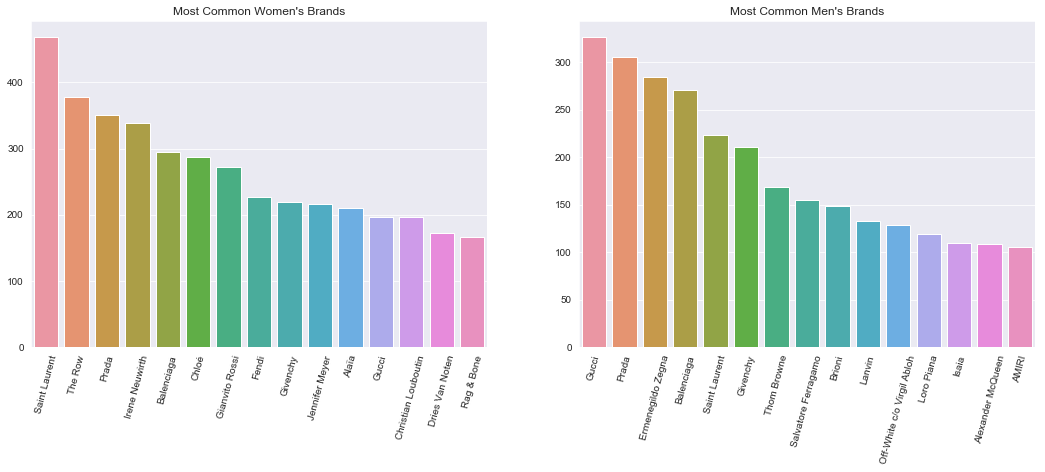

In [57]:
sns.set_style('darkgrid')
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
w_top_brands_bar = sns.barplot(w_top_brands.index, w_top_brands.values, ax=ax1)
ax1.set_title("Most Common Women's Brands")
for item in w_top_brands_bar.get_xticklabels():
    item.set_rotation(75)
m_top_brands_bar = sns.barplot(m_top_brands.index, m_top_brands.values, ax=ax2)
ax2.set_title("Most Common Men's Brands")
for item in m_top_brands_bar.get_xticklabels():
    item.set_rotation(75)

In [ ]:
men_updated.Brand.value_counts()['Gucci']

In [62]:
m = men_updated.groupby('Brand').Price.median().reset_index()

Text(0.5, 0, '')

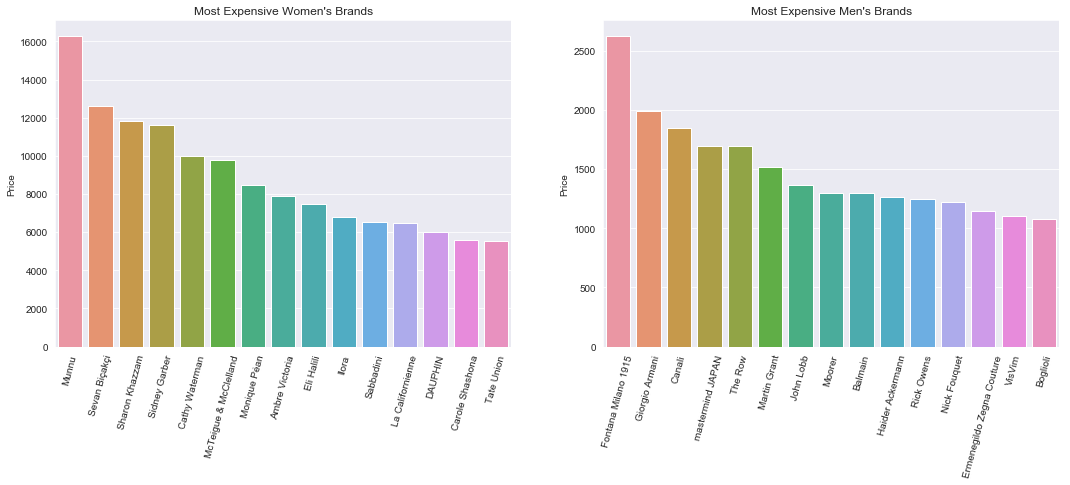

In [85]:
n = men_updated.Brand.value_counts().reset_index().sort_values(by='index')
n = n.rename(index=str, columns={'index': 'Brand', 'Brand': 'value_counts'}).reset_index().drop('index', axis=1)
men_price = pd.merge(m,n, on='Brand')
men_high_price = men_price[men_price.value_counts >10].sort_values(by='Price', ascending=False).head(15)
w = women_updated.groupby('Brand').Price.median().reset_index()
x = women_updated.Brand.value_counts().reset_index().sort_values(by='index')
x = x.rename(index=str, columns={'index': 'Brand', 'Brand': 'value_counts'}).reset_index().drop('index', axis=1)
women_price = pd.merge(w,x, on='Brand')
women_high_price = women_price[women_price.value_counts >10].sort_values(by='Price', ascending=False).head(15)
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
w_high_price_bar = sns.barplot(women_high_price.Brand, women_high_price.Price, ax=ax1)
ax1.set_title("Most Expensive Women's Brands")
for item in w_high_price_bar.get_xticklabels():
    item.set_rotation(75)
ax1.set_xlabel('')
m_high_price_bar = sns.barplot(men_high_price.Brand, men_high_price.Price, ax=ax2)
ax2.set_title("Most Expensive Men's Brands")
for item in m_high_price_bar.get_xticklabels():
    item.set_rotation(75)
ax2.set_xlabel('')

In [91]:
display(men.groupby('Category').std().sort_values(by='Price', ascending=False))
women.groupby('Category').std().sort_values(by='Price', ascending=False)

,Price
Category,
Suits/Sportcoats,1640.482664
Coats,1556.756510
Cufflinks,1062.778017
Bags/Leather_Goods,659.906165
Sweaters,590.107874
Pants,419.335739
Shoes,358.839413
Tops,350.051770
Shirts,338.602789


,Price
Category,
Jewelry,7351.480546
Coats,3899.572927
Bags,2202.556634
Jackets,1778.600807
Dresses,1484.072539
Skirts,932.880403
Tops,601.651155
Scarves,583.815328
Shorts,528.291505


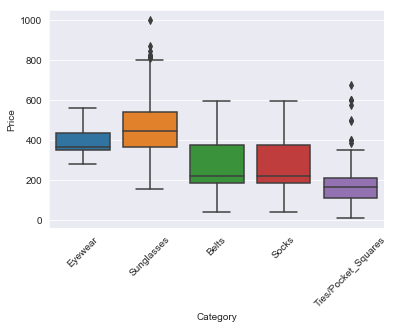

In [29]:
men_small_std = men[(men.Category == 'Eyewear') | (men.Category == 'Ties/Pocket_Squares') | (men.Category == 'Belts') | 
                   (men.Category == 'Socks') | (men.Category == 'Sunglasses')]
sns.set_style('darkgrid')
men_small_std_box = sns.boxplot(men_small_std.Category, men_small_std.Price)
for item in men_small_std_box.get_xticklabels():
    item.set_rotation(45)

Text(0.5, 1.0, "Men's Middle Variance Distribution")

<Figure size 864x576 with 0 Axes>

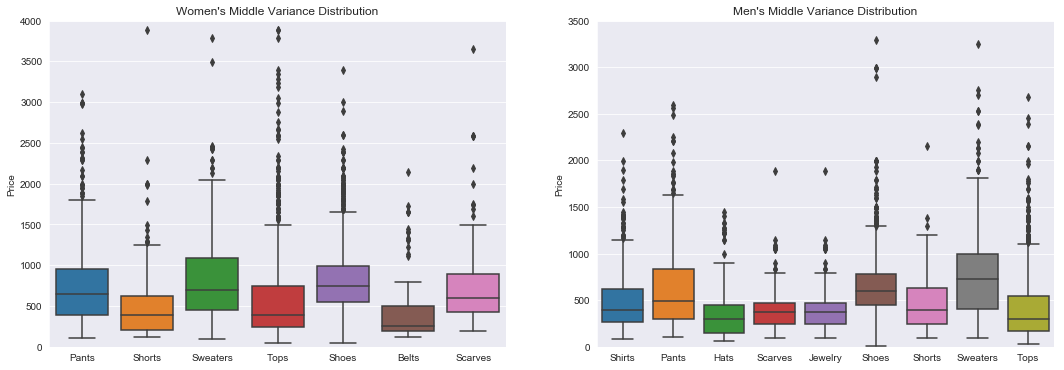

In [115]:
plt.figure(figsize=(12,8))
men_med_std = men[(men.Category == 'Hats') | (men.Category == 'Scarves') | (men.Category == 'Jewelry') | 
                   (men.Category == 'Shorts') | (men.Category == 'Shirts') | (men.Category == 'Tops')| 
                  (men.Category == 'Shoes') | (men.Category == 'Pants') | (men.Category == 'Sweaters')]
women_med_std = women[(women.Category == 'Tops') | (women.Category == 'Scarves') | (women.Category == 'Shorts') | 
                   (women.Category == 'Pants') | (women.Category == 'Shoes') | (women.Category == 'Belts')| 
                  (women.Category == 'Sweaters')]
f, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
women_med_std_box = sns.boxplot(women_med_std.Category, women_med_std.Price, ax=ax1)
# # for item in women_med_std_box.get_xticklabels():
#     item.set_rotation(55)
ax1.set_xlabel('')
ax1.set_ylim(0,4000)
ax1.set_title("Women's Middle Variance Distribution")
men_med_std_box = sns.boxplot(men_med_std.Category, men_med_std.Price, ax=ax2)
# for item in men_med_std_box.get_xticklabels():
#     item.set_rotation(45)
ax2.set_xlabel('')
ax2.set_ylim(0,3500)
ax2.set_title("Men's Middle Variance Distribution")


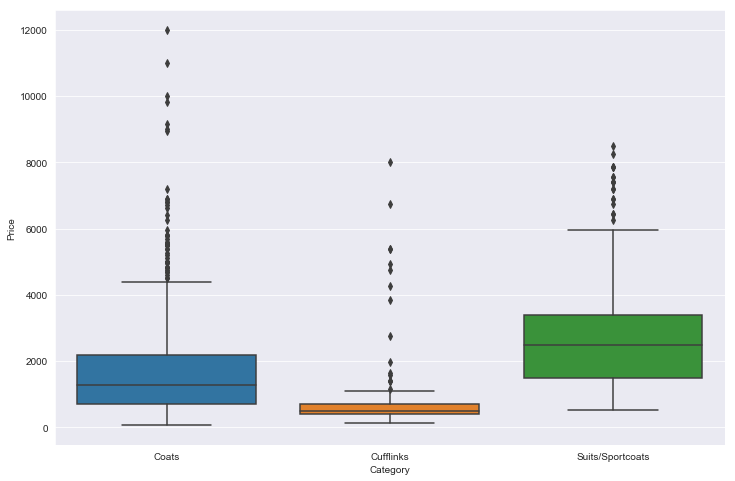

In [31]:
plt.figure(figsize=(12,8))
men_big_std = men[(men.Category == 'Cufflinks') | (men.Category == 'Coats') | (men.Category == 'Suits/Sportcoats')]
men_big_std_box = sns.boxplot(men_big_std.Category, men_big_std.Price)


In [32]:
men_updated = men_updated.reset_index()
men_updated = men_updated.drop('index', axis=1)
men_updated.head()

,Brand,Category,Price,Product_Name
0,Fioroni,Shirts,350.0,Cotton Chambray Shirt
1,Rag & Bone,Shirts,225.0,Fit 3 Plaid Cotton Flannel Shirt
2,AMIRI,Shirts,650.0,Gradient Plaid Cotton-Blend Flannel Shirt
3,Boglioli,Shirts,325.0,Slub-Weave Linen Shirt
4,Sartorio,Shirts,450.0,Gingham Cotton Button-Down Shirt


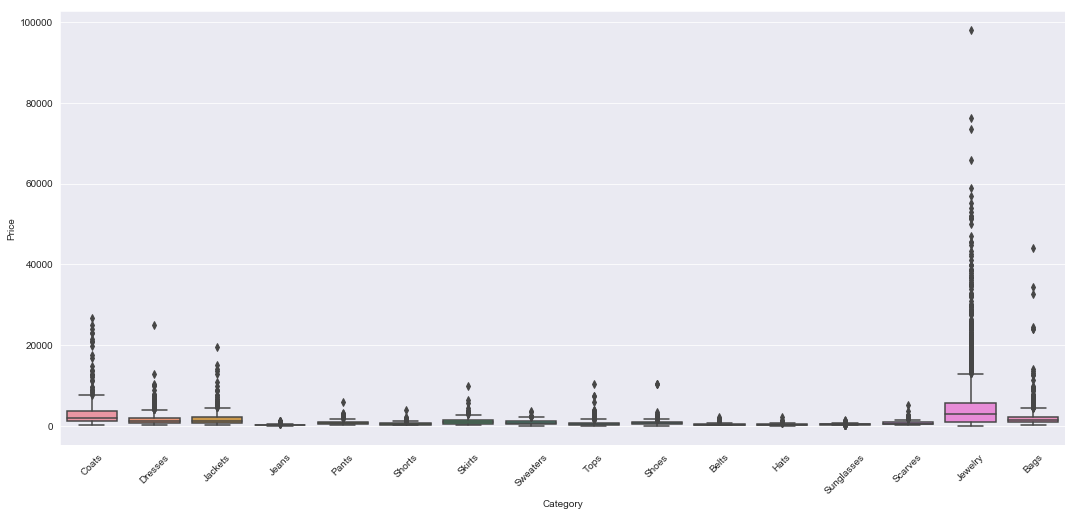

In [33]:
plt.figure(figsize=(18,8))
cat_wom_box = sns.boxplot(women_updated.Category, women_updated.Price)
for item in cat_wom_box.get_xticklabels():
    item.set_rotation(45)

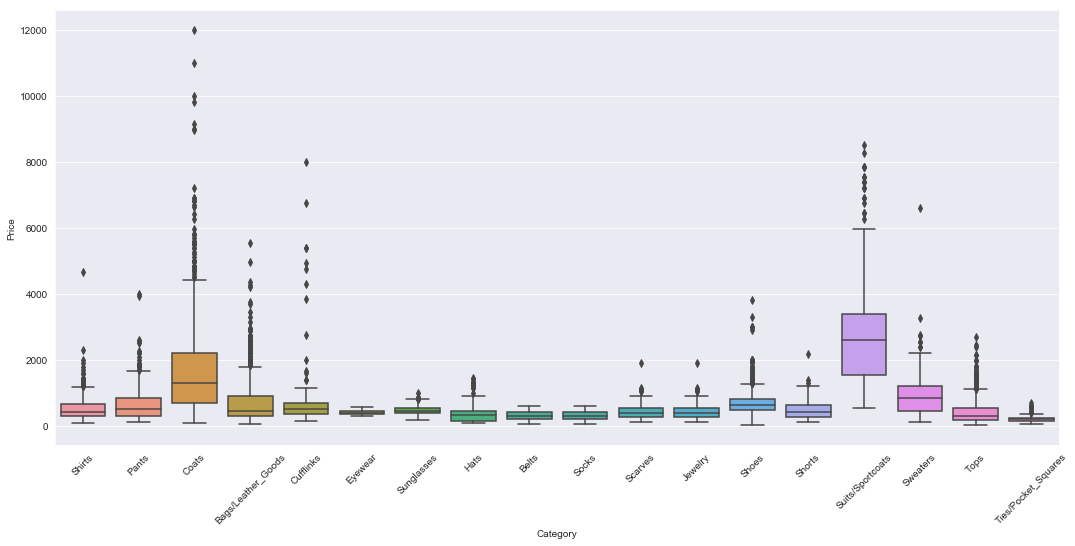

In [34]:
plt.figure(figsize=(18,8))
cat_men_box = sns.boxplot(men_updated.Category, men_updated.Price)
for item in cat_men_box.get_xticklabels():
    item.set_rotation(45)

In [35]:
men_tops = men_updated[men_updated.Category == 'Tops']
women_tops = women_updated[women_updated.Category == 'Tops']
men_sweaters = men_updated[men_updated.Category == 'Sweaters']
women_sweaters = women_updated[women_updated.Category == 'Sweaters']
men_pants = men_updated[men_updated.Category == 'Pants']
women_pants = women_updated[women_updated.Category == 'Pants']

Text(0.5, 1.0, 'Pants')

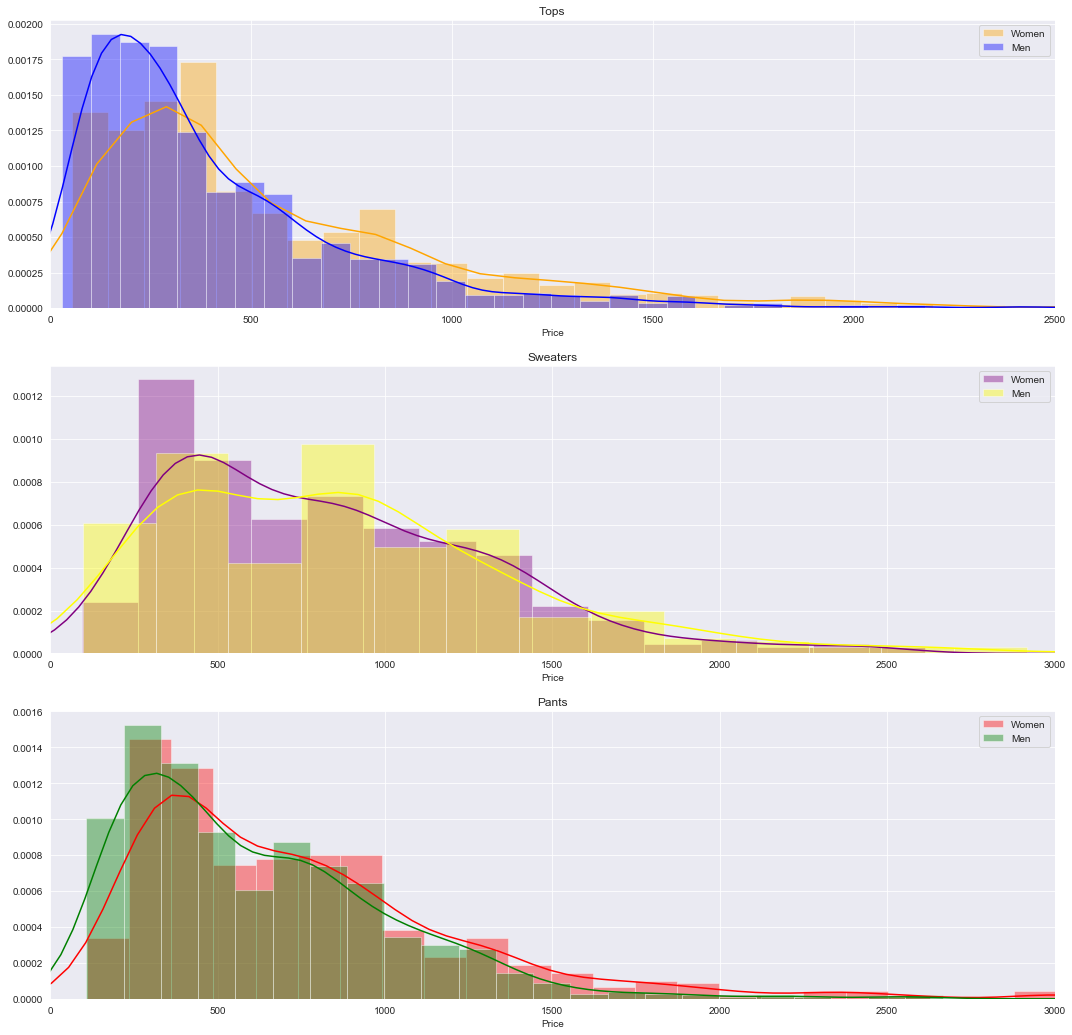

In [36]:
f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(18,18))
sns.distplot(women_tops.Price, bins='auto', ax=ax1, label='Women', color='orange')
sns.distplot(men_tops.Price, bins='auto', ax=ax1, label='Men', color='blue')
ax1.set_xlim(0, 2500)
ax1.legend()
ax1.set_title('Tops')
sns.distplot(women_sweaters.Price, bins='auto', ax=ax2, label='Women', color='purple')
sns.distplot(men_sweaters.Price, bins='auto', ax=ax2, label='Men', color='yellow')
ax2.set_xlim(0, 3000)
ax2.legend()
ax2.set_title('Sweaters')
sns.distplot(women_pants.Price, bins='auto', ax=ax3, label='Women', color='red')
sns.distplot(men_pants.Price, bins='auto', ax=ax3, label='Men', color='green')
ax3.set_xlim(0, 3000)
ax3.legend()
ax3.set_title('Pants')

In [123]:
men_updated['Decile'] = pd.qcut(men_updated.Price, 10, labels=False)
women_updated['Decile'] = pd.qcut(women_updated.Price, 10, labels=False)
men_less_skew = men_updated[men_updated.Decile < 8]
women_less_skew = women_updated[women_updated.Decile < 8]
men_updated[men_updated.Decile == 10]

C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Brand,Category,Price,Product_Name,Decile


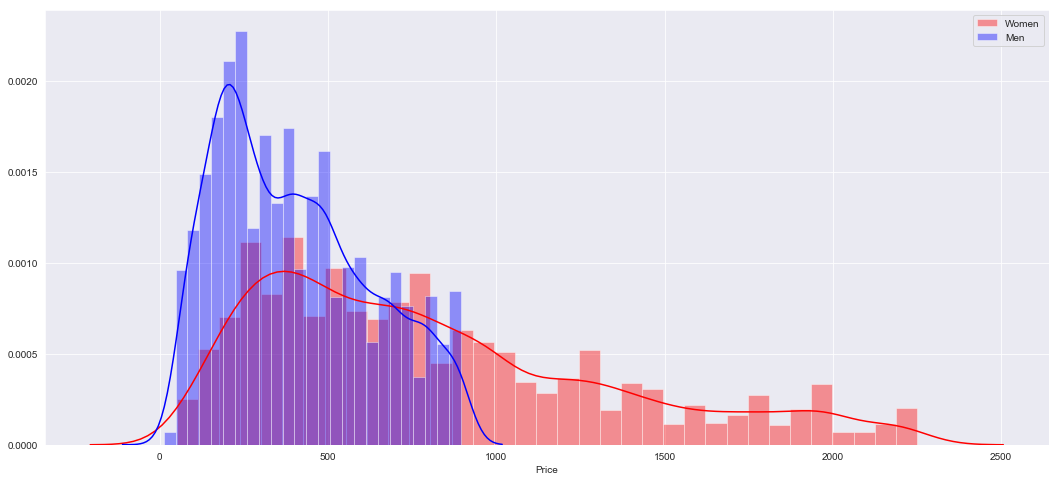

In [119]:
plt.figure(figsize=(18,8))
sns.distplot(women_less_skew.Price, bins='auto', label="Women" , color='red')
sns.distplot(men_less_skew.Price, bins='auto', label="Men", color='blue')
plt.legend()
sns.set_style('darkgrid')

In [126]:
men_future_cats = men[(men.Category == 'Shoes') | (men.Category == 'Socks') | (men.Category == 'Sweaters') | 
                   (men.Category == 'Tops') | (men.Category == 'Coats') | (men.Category == 'Pants')]
women_future_cats = women[women.Category == 'Shoes']

In [127]:
m_future_sample_means = []
f_future_sample_means = []
for x in range(0,100000):
    sample = men_future_cats.sample(n=50, replace=True)
    m_future_sample_means.append(sample.Price.mean())
for x in range(0,100000):
    sample = women_future_cats.sample(n=50, replace=True)
    f_future_sample_means.append(sample.Price.mean())

Text(0.5, 1.0, 'Women')

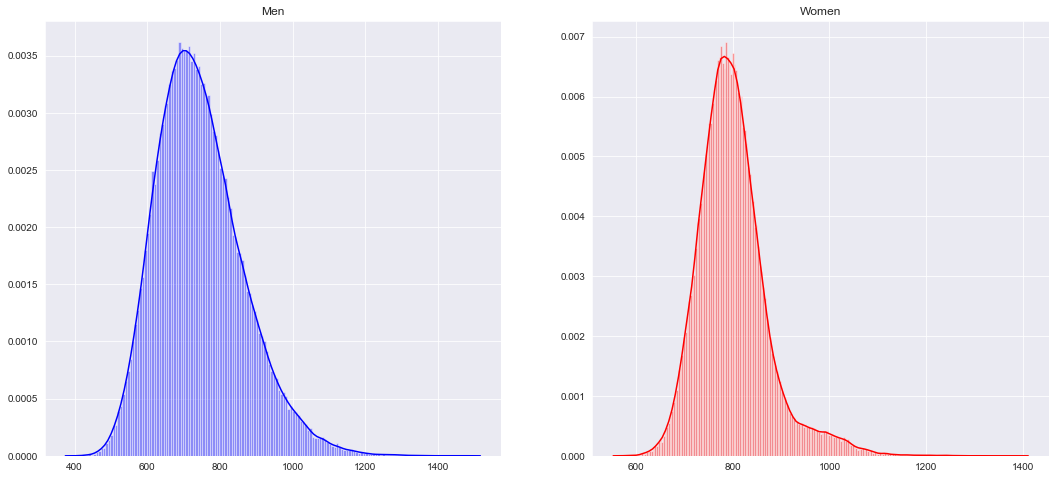

In [132]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(18,8))
sns.distplot(m_future_sample_means, bins='auto', ax=ax1, color='blue')
ax1.set_title('Men')
sns.distplot(f_future_sample_means, bins='auto', ax=ax2, color='red')
ax2.set_title('Women')

In [140]:
import math
future_m = [890, 595, 1675, 990, 1800, 440, 1100, 160, 880, 720,
           120, 790, 1300, 1050, 2800, 950, 690, 1200, 920, 6330,
            1350, 890, 1120, 120, 550, 495, 275, 1120, 1455]
nm = len(future_m)
sm = np.std(future_m)
mum = np.mean(m_future_sample_means)
x_barm = np.mean(future_m)
tm=(x_barm-mum)/(sm/math.sqrt(nm))
t_critm = stats.t.ppf(.975, nm-1)
tm<t_critm
tm, t_critm

(1.8415945188108007, 2.048407141795244)

In [139]:
future_w = [750, 750, 750, 770]
nw = len(future_w) #4
sw = np.std(future_w) #8.660254037844387
sigmaw = np.std(f_future_sample_means)
muw = np.mean(f_future_sample_means) #801.1051614
x_barw = np.mean(future_w) #755
tw=(x_barw-muw)/(sw/math.sqrt(nw))
t_critw = stats.t.ppf(.975, nw-1)
tw<t_critw
tw, t_critw

(-10.56404650489586, 3.182446305284263)

In [51]:
w_normal_sample_means = []
w_skew_sample_means = []
for x in range(0,100000):
    sample = women_less_skew.sample(n=50, replace=True)
    w_normal_sample_means.append(sample.Price.mean())
for x in range(0,100000):
    sample = women_updated.sample(n=50, replace=True)
    w_skew_sample_means.append(sample.Price.mean())

Text(0.5, 1.0, 'Sample Mean Distribution of All Data')

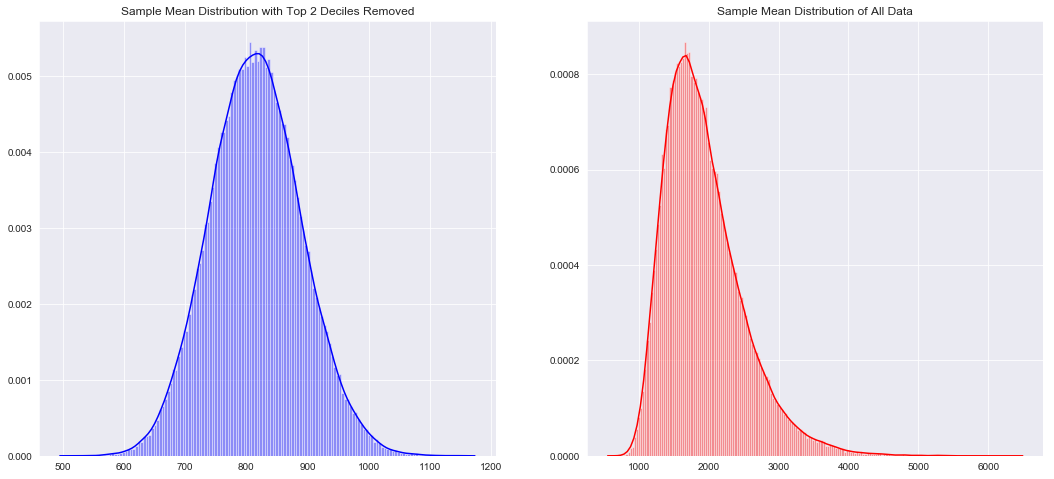

In [149]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(18,8))
sns.distplot(w_normal_sample_means, bins='auto', ax=ax1, color='blue')
ax1.set_title('Sample Mean Distribution with Top 2 Deciles Removed')
sns.distplot(w_skew_sample_means, bins='auto', ax=ax2, color='red')
ax2.set_title('Sample Mean Distribution of All Data')

In [74]:
skew_sample_means = m_skew_sample_means+w_skew_sample_means

In [94]:
import scipy.stats as stats
p = 1-stats.norm.cdf(z)
p

0.9684054542548494

In [97]:
mu

709.8473314